In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
plt.style.use('fivethirtyeight')


In [2]:
train_data_path = '../data/aug_red_eye/training_aug/train'
val_data_path = '../data/aug_red_eye/training_aug/val'
test_data_path = '../data/aug_red_eye/training_aug/test'

In [3]:
# define the classes for training
classes = os.listdir(train_data_path)

X_list = []
y_list = []
for class_ in classes:
    files = os.listdir(train_data_path + '/' + class_)
    #print(files)
    for file in files:
        img = load_img(path=train_data_path + '/' + class_+'/'+f'{file}',target_size=(128,128))
        x = np.array(img)
        X_list.append(x)
        y_list.append(class_)
        
X = np.array(X_list)/255
y = np.array(y_list)

In [4]:
y_series = pd.Series(y).map({classes[0]:0, classes[1]:1})
y = to_categorical(y_series)

In [5]:
# define the classes for val
classes = os.listdir(val_data_path)

X_list = []
y_list = []
for class_ in classes:
    files = os.listdir(val_data_path + '/' + class_)
    #print(files)
    for file in files:
        img = load_img(path=val_data_path + '/' + class_+'/'+f'{file}',target_size=(128,128))
        x = np.array(img)
        X_list.append(x)
        y_list.append(class_)
        
X_val = np.array(X_list)/255
y_val = np.array(y_list)

In [6]:
y_series_val = pd.Series(y_val).map({classes[0]:0, classes[1]:1})
y_val = to_categorical(y_series_val)

In [7]:
print(y_val)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [8]:
K.clear_session()

#defining the CNN2D model
model = Sequential([

    Conv2D(filters= 6, kernel_size=(5,5), strides=(1,1), input_shape=X[0].shape,
           activation=keras.activations.relu,
           padding='valid',kernel_regularizer=l2(0.0001)), # valid means no padding  #

    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'),
    
    Conv2D(filters = 16, kernel_size=(5,5),strides=(1,1),
           activation=keras.activations.relu, 
           padding = 'valid',kernel_regularizer=l2(0.0001)), # valid means no padding #,kernel_regularizer=l2(0.0001)
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'), # valid means no padding
    
    Flatten(),
    
    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=128, activation=keras.activations.relu),
    BatchNormalization(),
    
    # Fully connected dense layer with relu activation function
#     Dropout(0.2),
#     Dense(units=128, activation=keras.activations.relu),
#     BatchNormalization(),

    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=64, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=32, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected output layer with softmax
    Dense(units=2, activation=keras.activations.sigmoid)   # How many neurons? we want classify two classes
    
])

In [9]:
# compling the model
model.compile(optimizer=keras.optimizers.Adam(0.5e-4), 
                loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

cb = keras.callbacks.EarlyStopping(monitor="accuracy",
                                    min_delta=0.005,
                                    patience=30,
                                    verbose=1,
                                    mode="min",
                                    baseline=None,
                                    restore_best_weights=False)


In [10]:
history = model.fit(X,y,
        batch_size = 50, 
        epochs = 150,
        verbose = 1, 
        validation_data = (X_val, y_val))

Epoch 1/150
19/19 [==============================] - 4s 40ms/step - loss: 0.8578 - accuracy: 0.5332 - val_loss: 0.6987 - val_accuracy: 0.4970
Epoch 2/150
19/19 [==============================] - 0s 14ms/step - loss: 0.7339 - accuracy: 0.6428 - val_loss: 0.7039 - val_accuracy: 0.4970
Epoch 3/150
19/19 [==============================] - 0s 14ms/step - loss: 0.6722 - accuracy: 0.6702 - val_loss: 0.7141 - val_accuracy: 0.4970
Epoch 4/150
19/19 [==============================] - 0s 14ms/step - loss: 0.6081 - accuracy: 0.7239 - val_loss: 0.7228 - val_accuracy: 0.4970
Epoch 5/150
19/19 [==============================] - 0s 14ms/step - loss: 0.5619 - accuracy: 0.7724 - val_loss: 0.7309 - val_accuracy: 0.4970
Epoch 6/150
19/19 [==============================] - 0s 15ms/step - loss: 0.5109 - accuracy: 0.8072 - val_loss: 0.7356 - val_accuracy: 0.4970
Epoch 7/150
19/19 [==============================] - 0s 15ms/step - loss: 0.4766 - accuracy: 0.8240 - val_loss: 0.7422 - val_accuracy: 0.4970
Epoch 

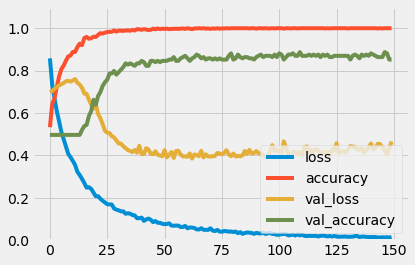

In [11]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1.1) # set the y range to [0,1]
plt.show()


# To save the model

#model.save(r"..\models\model.h5")

In [12]:
# define the classes for val
classes = os.listdir(test_data_path)

X_list = []
y_list = []
for class_ in classes:
    files = os.listdir(test_data_path + '/' + class_)
    #print(files)
    for file in files:
        img = load_img(path=test_data_path + '/' + class_+'/'+f'{file}',target_size=(128,128))
        x = np.array(img)
        X_list.append(x)
        y_list.append(class_)
        
X_test = np.array(X_list)/255
y_test = np.array(y_list)

y_series_test = pd.Series(y_test).map({classes[0]:0, classes[1]:1})
y_test = to_categorical(y_series_test)

In [13]:
print()
print('Model Evalution Score')
print(model.evaluate(X_test, y_test))

Model Evalution Score
1/1 [==============================] - 0s 58ms/step - loss: 0.0721 - accuracy: 1.0000
[0.0720888301730156, 1.0]
